<a href="https://colab.research.google.com/github/DiaJoshua/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/Exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [216]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [217]:
faces = fetch_olivetti_faces()

In [218]:
faces.data.shape

(400, 4096)

In [219]:
faces.images.shape

(400, 64, 64)

In [220]:
faces.target.shape

(400,)

In [221]:
faces.target[200]

20

#### 1. Plot the image of index zero

Text(0.5, 1.0, 'Image of Index 0')

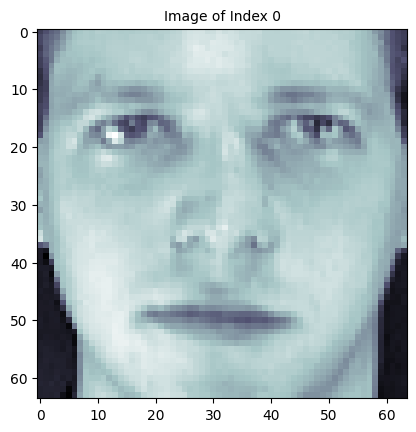

In [241]:
# put your answer here
plt.figure()
plt.imshow(faces.images[0], cmap=plt.cm.bone)
plt.title('Image of Index 0', fontsize = 10)

#### 2. Create a subplot of 10 images in a 3x3 configuration

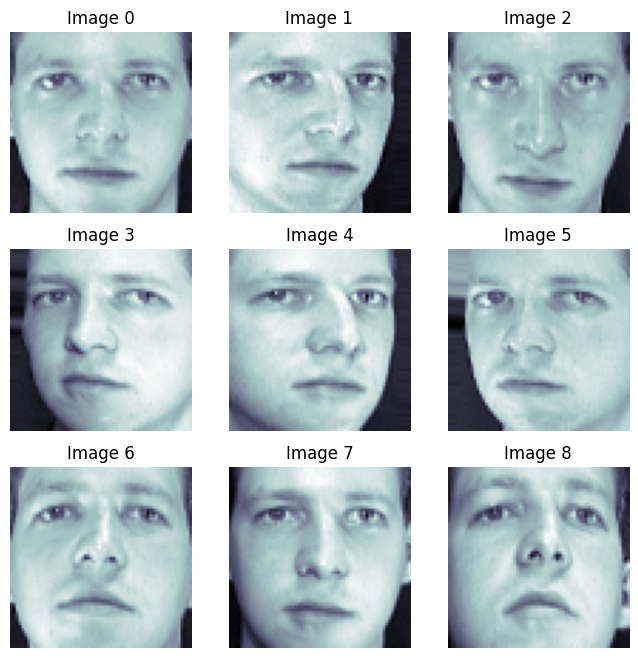

In [237]:
# put your answer here
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(9):
  ax = axes[i // 3, i % 3]
  ax.imshow(faces.images[i], cmap=plt.cm.bone)
  ax.set_title(f"Image {i}")
  ax.axis('off')
plt.show()

#### 3. Split the data into a training and test set

In [224]:
# put your answer here
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)

#### 4. Create a new instance of the LogisticRegression class

In [225]:
# put your answer here
lr = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [226]:
# put your answer here
lr.fit(train_img, train_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [227]:
# put your answer here
pred = lr.predict(test_img)

#### 7. Get the accuracy using the `score()` function

In [228]:
# put your answer here
score = lr.score(test_img, test_lbl)
print("Accuracy Score: ", score)

Accuracy Score:  0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

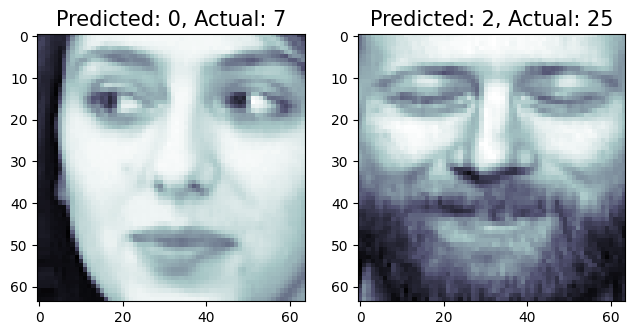

In [246]:
# put your answer here
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
  plt.subplot(1, 5, plotIndex + 1)
  plt.imshow(np.reshape(test_img[badIndex], (64,64)), cmap=plt.cm.bone)
  plt.title('Predicted: {}, Actual: {}'.format(pred[badIndex], test_lbl[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [230]:
# put your answer here
clf = SGDClassifier(loss="log_loss", penalty="l2")

#### 10. Train the model using the training set using the `fit()` function

In [231]:
# put your answer here
clf.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [232]:
# put your answer here
y_pred = clf.predict(test_img)

#### 12. Get the accuracy using the `score()` function

In [233]:
# put your answer here
clf.score(test_img, test_lbl)
print("Accuracy Score: ", score)

Accuracy Score:  0.9655172413793104


#### 13. Find the best number of iterations to get the best accuracy

Accuracy Score:  0.8793103448275862
Accuracy Score:  0.8620689655172413
Accuracy Score:  0.8448275862068966


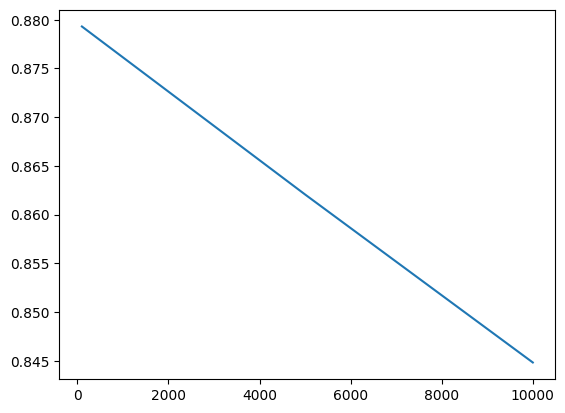

In [245]:
# put your answer here
num_iter = [100, 5000, 10000]
scores = []

for i in num_iter:
  clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
  clf.fit(train_img, train_lbl)
  y_pred = clf.predict(test_img)
  score = clf.score(test_img, test_lbl)
  scores.append(score)
  print("Accuracy Score: ", score)

plt.plot(num_iter, scores)